In [1]:
import numpy as np
import sys
from os import listdir
from os.path import isfile, join
from tqdm import tqdm

from site_utils import *
from data_utils import *

## This notebook contains general metadata analysis and data smoothing function for the labels. 

## Metadata Analysis

In [55]:
labels_path = '../data/parsed/labels/'

data_files = [f for f in listdir(labels_path) if isfile(join(labels_path, f))]
data_files = data_files
print("No. Pdbs: ", len(data_files))

No. Pdbs:  47968


In [56]:
pdbs_400 = np.load('./datasets/dataset_400.npy')
pdbs = data_files
pdb_dict = np.load('../data/pdb_meta_dict.npy').item()

In [74]:
residue_length = []
ligand_no = []
bad_list = []

for idx, pdb in enumerate(list(pdbs)):
    try:
        meta = pdb_dict[pdb[:-4]]
        residue_length.append(int(meta[0]))
        ligand_no.append(int(meta[1]))
    except:
        bad_list.append(pdb)

residue_length_400 = []
ligand_no_400 = []
for idx, pdb in enumerate(list(pdbs_400)):
    try:
        meta = pdb_dict[pdb[:-4]]
        residue_length_400.append(int(meta[0]))
        ligand_no_400.append(int(meta[1]))
    except:
        bad_list.append(pdb)
        

train_residue_length = residue_length_400[1939+500:]
train_ligand_no = ligand_no_400[1939+500:]
val_residue_length = residue_length_400[500:1939+500]
val_ligand_no = ligand_no_400[500:1939+500]
test_residue_length = residue_length_400[:500]
test_ligand_no = ligand_no_400[:500]

7745
1939
500


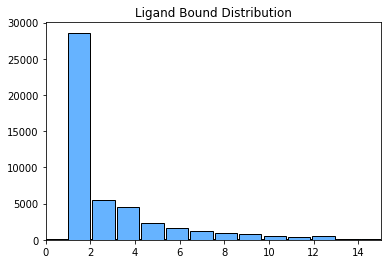

In [99]:
plt.hist(residue_length, bins=50, width=10, edgecolor='k', color='#66b3ff')
plt.axvline(400, color='k', linestyle='dashed', linewidth=1)
plt.title('Protein Length Distribution')
#plt.show()
plt.savefig('full_res_dist', dpi = 300)

plt.hist(ligand_no, bins=200, width=1, edgecolor='k', color='#66b3ff')
plt.xlim((0,15))
plt.title('Ligand Bound Distribution')
#plt.show()
plt.savefig('full_lig_dist', dpi = 300)

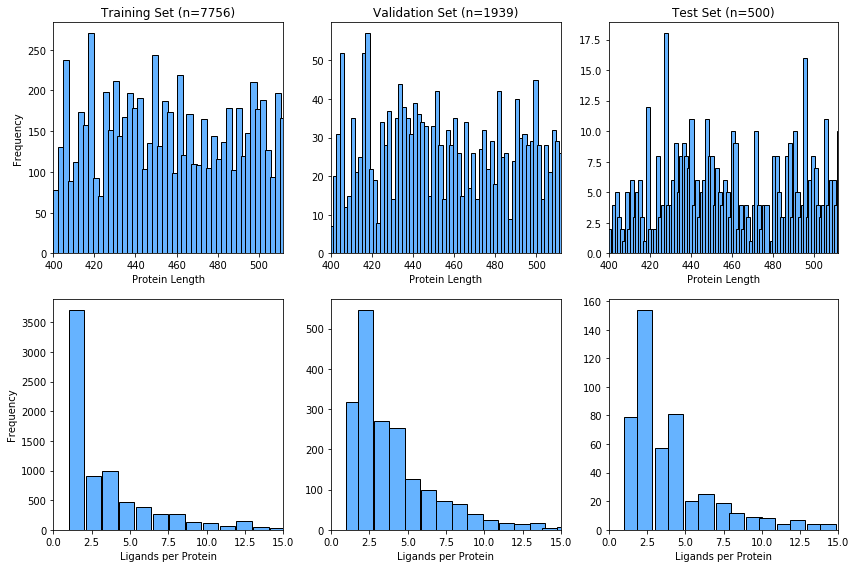

In [98]:
fig, ax = plt.subplots(2,3)

ax[0,0].hist(train_residue_length, bins=100, width=3, edgecolor='k', color='#66b3ff')
ax[0,0].set_title('Training Set (n=7756)')
ax[0,0].set_xlim((400,512))
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_xlabel('Protein Length')


ax[1,0].hist(train_ligand_no, bins=200, width=1, edgecolor='k', color='#66b3ff')
ax[1,0].set_xlim((0,15))
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_xlabel('Ligands per Protein')


ax[0,1].hist(val_residue_length, bins=100, width=2, edgecolor='k', color='#66b3ff')
ax[0,1].set_title('Validation Set (n=1939)')
ax[0,1].set_xlim((400,512))
ax[0,1].set_xlabel('Protein Length')


ax[1,1].hist(val_ligand_no, bins=200, width=1, edgecolor='k', color='#66b3ff')
ax[1,1].set_xlim((0,15))
ax[1,1].set_xlabel('Ligands per Protein')

ax[0,2].hist(test_residue_length, bins=100, width=2, edgecolor='k', color='#66b3ff')
ax[0,2].set_title('Test Set (n=500)')
ax[0,2].set_xlim((400,512))
ax[0,2].set_xlabel('Protein Length')


ax[1,2].hist(test_ligand_no, bins=200, width=1, edgecolor='k', color='#66b3ff')
ax[1,2].set_xlim((0,15))
ax[1,2].set_xlabel('Ligands per Protein')

fig.set_size_inches(12, 8, forward=True)
fig.tight_layout()
#plt.show()
plt.savefig('meta_dist', dpi = 300)

## Data Smoothing for Labels

This part of the notebook was used for smoothing labels over the dataset. Future work will incorporate this more seamlessly into SITEFINDER.

In [39]:
labels = np.load('./datasets/dataset_400_labels.npy')

In [4]:
pdbs = np.load('./datasets/dataset_400.npy')
labels = np.zeros((len(pdbs),512))

In [7]:
labels_path = '../data/parsed/labels/'

for idx,pdb in tqdm(enumerate(pdbs)):
    labels[[idx],:] = np.load(labels_path + pdb)

10195it [02:17, 73.99it/s]


In [74]:
import scipy
from scipy.ndimage.filters import gaussian_filter

smooth_labels = np.zeros(labels.shape)

# Image filter processing
for i in tqdm(range(labels.shape[0])):
    new_lab = scipy.ndimage.filters.gaussian_filter(labels[i,:],sigma=2)
    new_lab[new_lab > 0.25] = 1
    new_lab = new_lab.round()
    
    smooth_labels[i,:] =  new_lab
    
get_frequency(smooth_labels)

100%|██████████| 10195/10195 [00:01<00:00, 7603.87it/s]
